# Diabetes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'BMI')

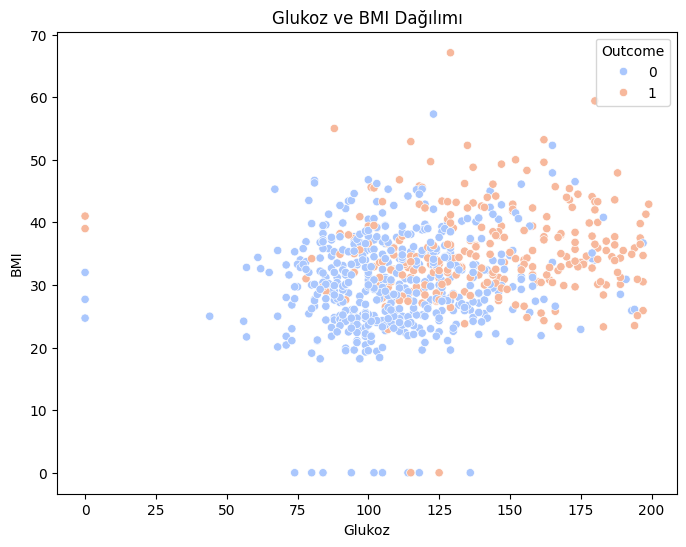

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"], palette="coolwarm")
plt.title("Glukoz ve BMI Dağılımı")
plt.xlabel("Glukoz")
plt.ylabel("BMI")

Text(0.5, 1.02, 'Pair Plot (Scatter Matrix)')

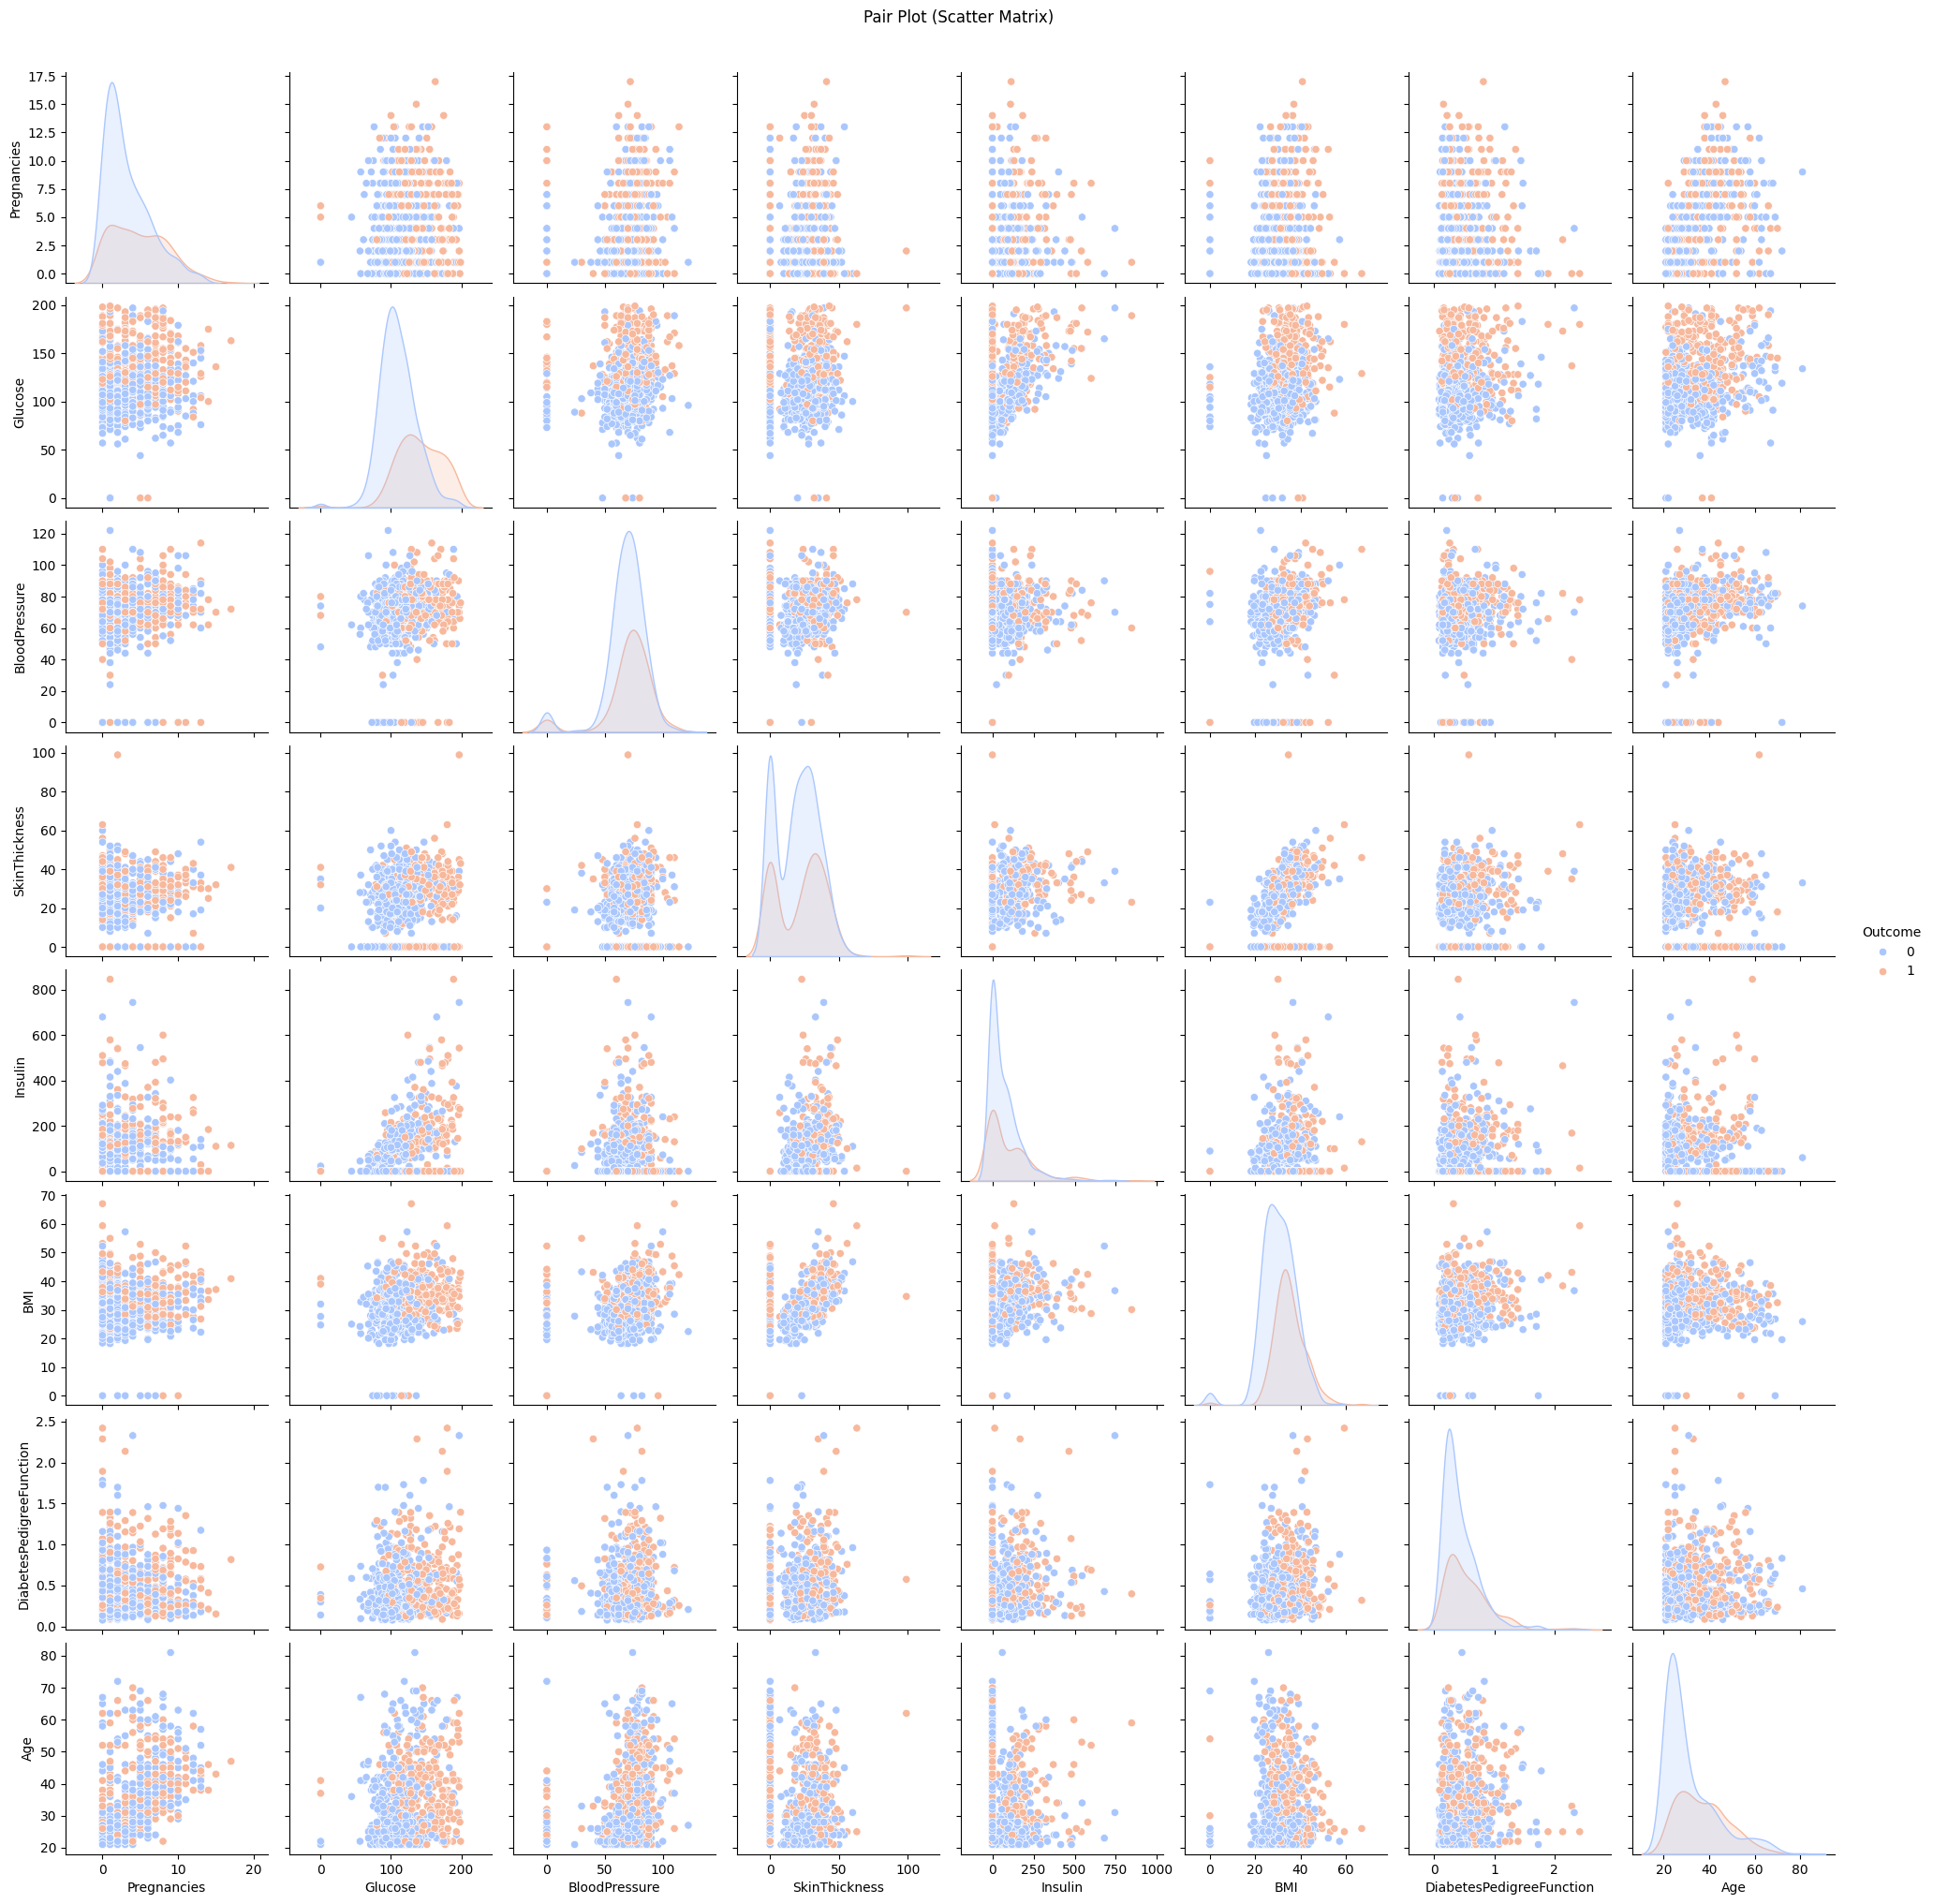

In [94]:
sns.pairplot(df, hue="Outcome", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pair Plot (Scatter Matrix)", y=1.02)

<Axes: >

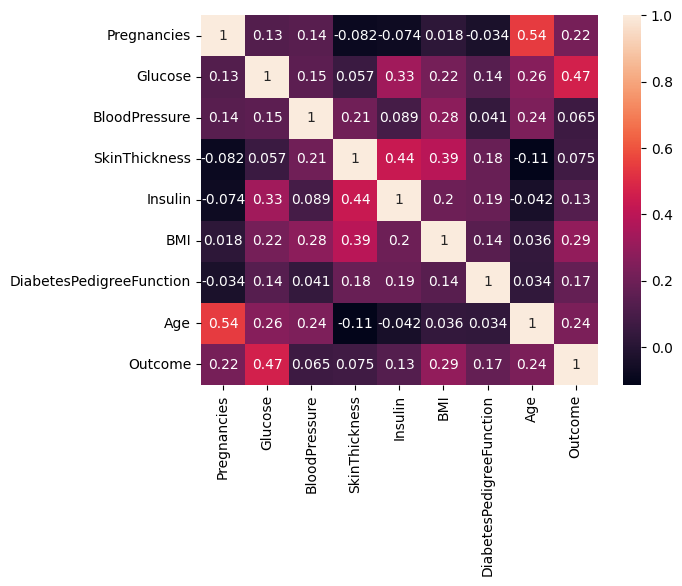

In [8]:
sns.heatmap(df.corr() , annot=True)

# TRAİN TEST AND STANDART SCALER

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [129]:
x= df.drop("Outcome" ,axis=1)
y = df["Outcome"]  # Liste yerine doğrudan sütunu alın


In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=42)


In [131]:
model = StandardScaler()

In [132]:
scaler_X_train = model.fit_transform(X_train)
scaler_X_test = model.transform(X_test)

# LOGİSTİC REGR

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       151
           1       0.37      0.33      0.35        80

    accuracy                           0.58       231
   macro avg       0.52      0.52      0.52       231
weighted avg       0.56      0.58      0.57       231



C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


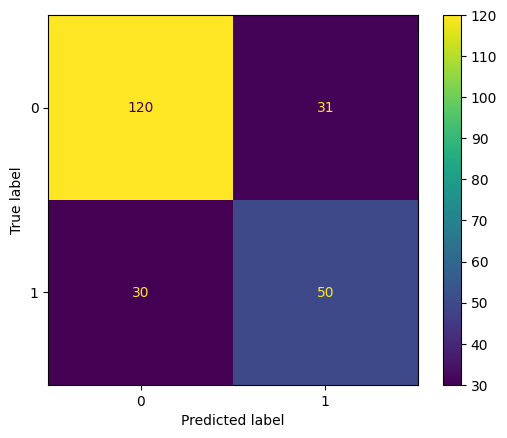

In [145]:
# LOGİSTİC REGR
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(scaler_X_train,y_train)
pred = log_model.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay , r2_score , classification_report
ConfusionMatrixDisplay.from_estimator(log_model , scaler_X_test , y_test)
print(classification_report(y_test , random_pred))

* Grid Search ile

In [146]:
from sklearn.model_selection import GridSearchCV

In [134]:
log_model= LogisticRegression()

In [135]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
    }

In [136]:
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaler_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [137]:
print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Skor:", grid_search.best_score_)

En İyi Parametreler: {'C': 0.1, 'solver': 'lbfgs'}
En İyi Skor: 0.7783662166839737


In [138]:
best_log_model = grid_search.best_estimator_
y_pred = best_log_model.predict(scaler_X_test)

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay , r2_score , classification_report

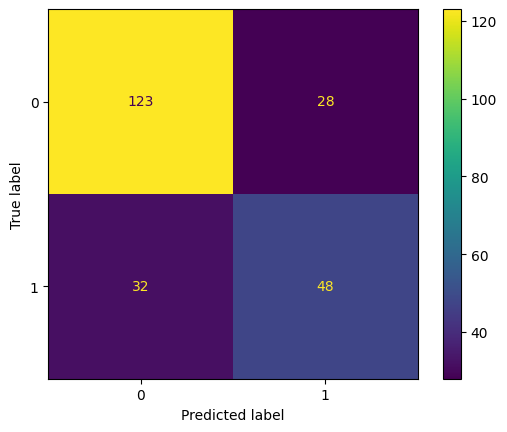

In [141]:
ConfusionMatrixDisplay.from_estimator(best_log_model , scaler_X_test , y_test)

In [142]:
print(classification_report(y_test , random_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       151
           1       0.37      0.33      0.35        80

    accuracy                           0.58       231
   macro avg       0.52      0.52      0.52       231
weighted avg       0.56      0.58      0.57       231



# Decision Tree

In [21]:
x= pd.get_dummies(df.drop("Outcome",axis =1), drop_first=True )
y= df["Outcome"]


In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

# DESICION TREE

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier()
model.fit(X_train , y_train)

DecisionTreeClassifier()

In [27]:
pred_decision = model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay 

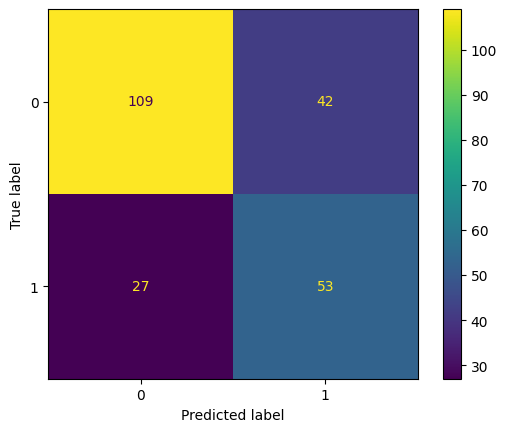

In [29]:
ConfusionMatrixDisplay.from_estimator(model , X_test , y_test)

In [30]:
print(classification_report(y_test, pred_decision))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



# KNN

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [32]:
model_scaler = StandardScaler()

In [33]:
scaler_X_train_knn = model_scaler.fit_transform(X_train)
scaler_X_test_knn = model_scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

* Grid Search

In [35]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(scaler_X_train_knn , y_train)

param_grid = {
    'n_neighbors': list(range(1, 31)),  # 1 ile 30 arasında en iyi K değeri bulunacak
    'weights': ['uniform', 'distance'],  # Ağırlıklandırma türü
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Mesafe metriği
}


In [36]:
# GridSearchCV çalıştırma
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(scaler_X_train_knn, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [147]:
# En iyi parametreleri ve modeli yazdırma
print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Skor:", grid_search.best_score_)

# En iyi model ile test setinde tahmin yapma
best_knn = grid_search.best_estimator_
final_pred = best_knn.predict(scaler_X_test_knn)


En İyi Parametreler: {'C': 0.1, 'solver': 'lbfgs'}
En İyi Skor: 0.7783662166839737


In [148]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,accuracy_score

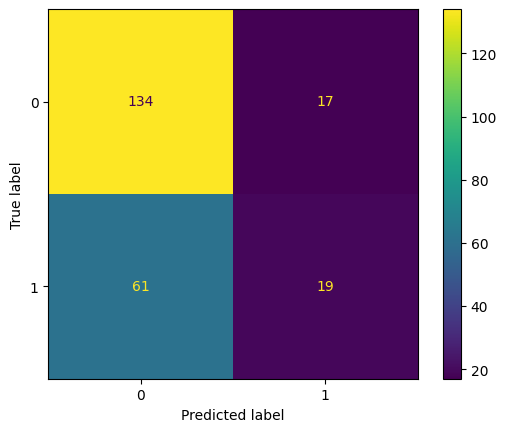

In [149]:
ConfusionMatrixDisplay.from_estimator(knn , scaler_X_test_knn , y_test)

In [150]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



* En iyi değer

# Random Forest

In [41]:
x= df.drop("Outcome" , axis=1)
y=pd.get_dummies(df["Outcome"] , drop_first=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
  x, y, test_size=0.3, random_state=9)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [84]:
n_est = [15]
# 2,3,4,5,6,9,12,15,19,20,21,22,23,24

max_feat = [1,2,3,4,5,6,7]

bootstrap = [True , False]
oob = [True,False]

parameters = {
    "n_estimators":n_est,
    "max_features": max_feat,
    "bootstrap": bootstrap,
    "oob_score": oob    
    }


In [85]:
random = RandomForestClassifier()

In [86]:
grid = GridSearchCV(random , parameters)

In [87]:
grid.fit(X_train,y_train)

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [15], 'oob_score': [True, False]})

In [88]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 15, 'oob_score': True}

In [89]:
random_pred =grid.predict(X_test)

In [90]:
print(classification_report(y_test,random_pred))

              precision    recall  f1-score   support

       False       0.77      0.83      0.80       150
        True       0.63      0.54      0.58        81

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



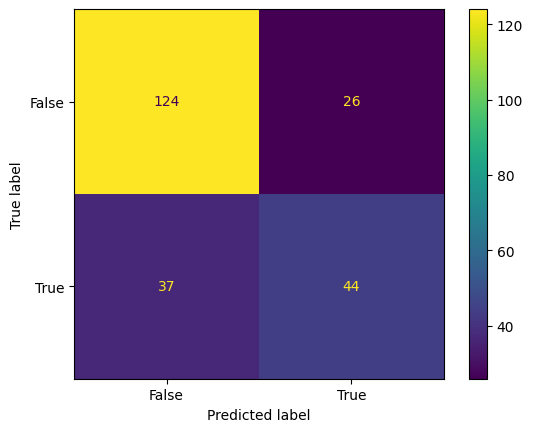

In [91]:
ConfusionMatrixDisplay.from_estimator(grid , X_test , y_test)